# The influence of a sub-lithospheric layer width on the partitoning of subduction surface motion and the induced mantle flow
![alt](../img/SLL3D.png) 

## Goals:

    Describe the relationship bettween the toroidal:poloidal ratio and the subduction partitionig vs. SLL width.

    Apply Linear and Non liner Regression and plot the results
    


In [1]:
# Import libraries
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines
import itertools
import math
from scipy import stats
from scipy.stats import pearsonr  
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

In [2]:
# Plotting data
ndirs_mantleflow             = [1,10,6,8,4] 
ndirs_velocity               = [1,3,7,5,9, 4,8,6,10]
# Surface motions
Vpmag                        = np.array([2.5025651501496613,3.6241665283346278, 4.5125663357343422, 5.3561187289356731, 6.4611815337388379])
Vt                           = np.array([-0.92865887,  -0.78003195, -0.15118985, 0.3911321 ,  0.99889706 ])
subpart                      = (Vt) / (Vpmag)
# Widht ratio between SLL and plate width 
Wstar                        = np.array([0,0.25,0.5,0.75,1,])
# Toroidal:poloidal ratios at different depths
Psi_Phi_surf                 = np.array([ 0.02692083,  0.18047991,  0.23237928, 0.1948239,  0.00445738])

Psi_Phi_lab                  = np.array([ 0.04981859, 1.67926499, 1.71725947, 1.49693704, 0.03508642])

Psi_Phi_660                  = np.array([0.00780755, 0.33550803, 0.50396209, 0.46644098,0.01459819])
outputPath                   = os.path.join(os.path.abspath("."),"/Users/roberta/Desktop")

In [3]:
# Define function to calculate r-squared
def polyfit(x, y, degree):
    
    results = {}
    coeffs  = np.polyfit(x, y, degree)
    p       = np.poly1d(coeffs)
    #calculate r-squared
    yhat  = p(x)
    ybar  = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

In [4]:
def regression(x_train,y_train, degree, labels, styles, colours):
    
    mymodel = np.poly1d(np.polyfit(x_train, y_train, degree))
    myline  =  np.arange(-0.1, 1.1, 0.01)
    print("the equation looks like this", np.poly1d(mymodel))
    
    plt.plot(myline, mymodel(myline), colours, label= labels, linestyle = styles)

the equation looks like this          2
-0.8883 x + 0.8761 x + 0.02289
({'r_squared': 0.9921271330179868}, 'Surface Potential Partitioning')
the equation looks like this         2
-7.361 x + 7.276 x + 0.1179
{'r_squared': 0.9709174985765493} LAB Potential Partitioning
the equation looks like this         2
-2.017 x + 2.075 x - 0.01539
{'r_squared': 0.9702829406582697} Deep Potential Partitioning
the equation looks like this          3          2
-0.2711 x + 0.1509 x + 0.6459 x - 0.3732
{'r_squared': 0.9982186971720884} Subduction Partitioning
the equation looks like this  
0.5358 x - 0.3464
{'r_squared': 0.977336215861069} Subduction Partitioning LR
PearsonRResult(statistic=0.9886031639950726, pvalue=0.0014580300494141803)
SignificanceResult(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24)


<Figure size 640x480 with 0 Axes>

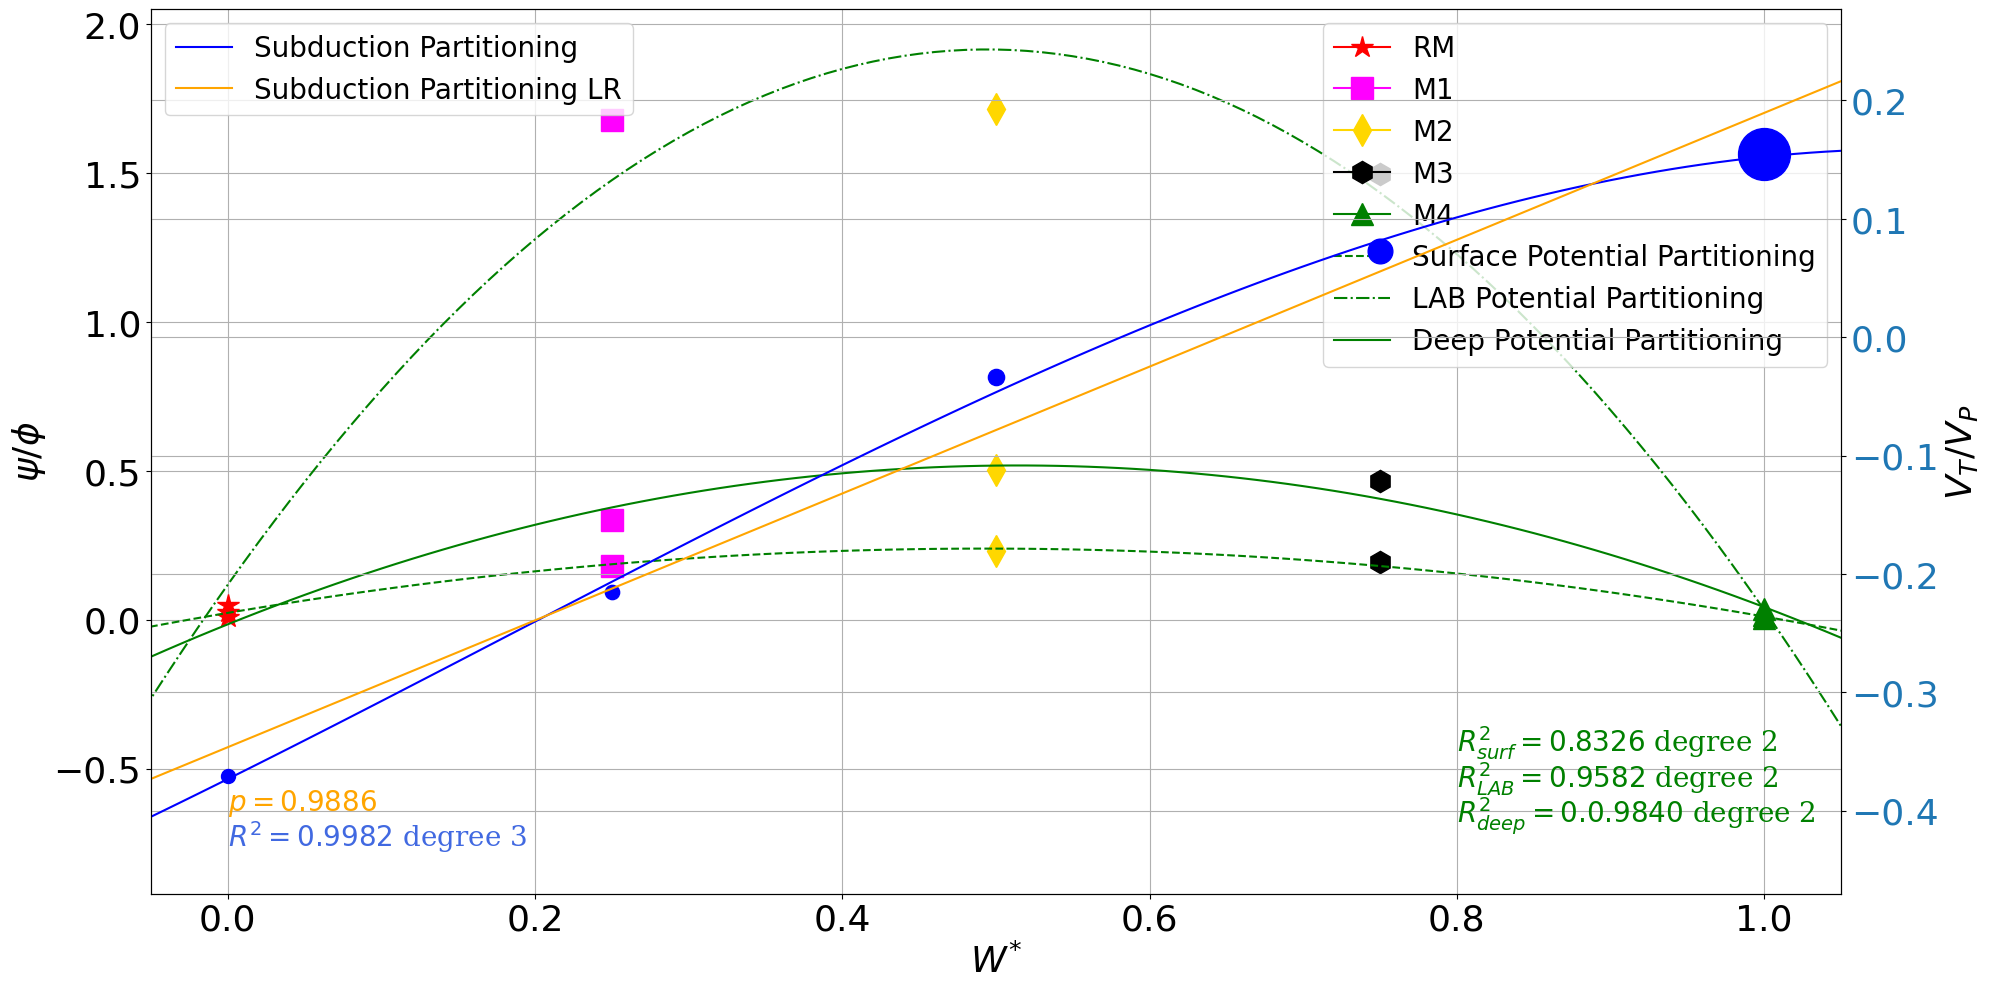

In [5]:
plt.figure(1)
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()
colors   = ['red', 'magenta','gold','black','green']
labels   = ['RM', 'M1' ,'M2','M3','M4']
markers  = ['*','s','d','h','^','o','s','d','H'] 

for item in range (len(Wstar)):

    
    ax1.plot(Wstar[item],Psi_Phi_surf[item], color=colors[item], label=labels[item],  marker=markers[item],markersize=16,)
    ax1.plot(Wstar[item],Psi_Phi_lab[item],  color=colors[item], marker=markers[item], markersize=16,)
    ax1.plot(Wstar[item],Psi_Phi_660[item],  color=colors[item], marker=markers[item], markersize=16,)
    

ax1.tick_params(axis='y', labelcolor="black", labelsize=26,)
ax1.tick_params(axis='x', labelcolor="black", labelsize=26,)
ax1.set_xlabel(r'$W^{*}$', fontsize=26, )
ax1.set_ylabel(r'$\psi/\phi$', fontsize=26, color="black", )


regression(Wstar,Psi_Phi_surf,2,"Surface Potential Partitioning", "--","green")
print((polyfit(Wstar,Psi_Phi_surf,2),"Surface Potential Partitioning"))


regression(Wstar,Psi_Phi_lab,2,"LAB Potential Partitioning","-.","green")
print(polyfit(Wstar,Psi_Phi_lab,2),"LAB Potential Partitioning")

regression(Wstar,Psi_Phi_660,2,"Deep Potential Partitioning","-","green")
print(polyfit(Wstar,Psi_Phi_660,2),"Deep Potential Partitioning")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
sizes = [100 + 6 ** n for n in range(len(Wstar))]

for item in range (len(Wstar)):

    ax2.scatter(Wstar[item],subpart[item], s=sizes[item], c="blue",)

ax2.set_ylabel(r"$V_{T}/V_{P}$",fontsize=26, color="black",)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color,labelsize=26,)
regression(Wstar,subpart,3,"Subduction Partitioning", "-", "blue")
print(polyfit(Wstar,subpart,3),"Subduction Partitioning")

ax1.grid()
ax2.grid()


regression(Wstar,subpart,1,"Subduction Partitioning LR", "-", "Orange")
print(polyfit(Wstar,subpart,1),"Subduction Partitioning LR")
print(pearsonr(Wstar,subpart))
print(spearmanr(Wstar,subpart))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
plt.xlim(-0.05, 1.05)

font_vtvp = {'family': 'serif',
        'color':  'royalblue',
        'weight': 'normal',
        'size': 20,
        }

plt.text(0., -0.43, r'$R^{2}=0.9982$ degree 3', fontdict=font_vtvp)
plt.text(0., -0.40, r'$p=0.9886$', fontdict=font_vtvp, color=  'orange',)



font_tp = {'family': 'serif',
        'color':  'green',
        'weight': 'normal',
        'size': 20,
        }
plt.text(0.8, -0.35, r'$R^{2}_{surf}=0.8326$ degree 2', fontdict=font_tp)
plt.text(0.8, -0.38, r'$R^{2}_{LAB}= 0.9582$ degree 2', fontdict=font_tp)
plt.text(0.8, -0.41, r'$R^{2}_{deep}=0.0.9840$ degree 2', fontdict=font_tp)


plt.savefig("/Users/roberta/Desktop/"+"figure9.pdf",transparent=True, bbox_inches='tight')
plt.show()